<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import nan
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
from datetime import date
import math
from scipy.stats import pearsonr

In [2]:
try:
    data = pd.read_csv('C:/Users/MiPro/Desktop/python/python/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    
#читаем файл, сепаратор табуляция

In [3]:
#посмотрим данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


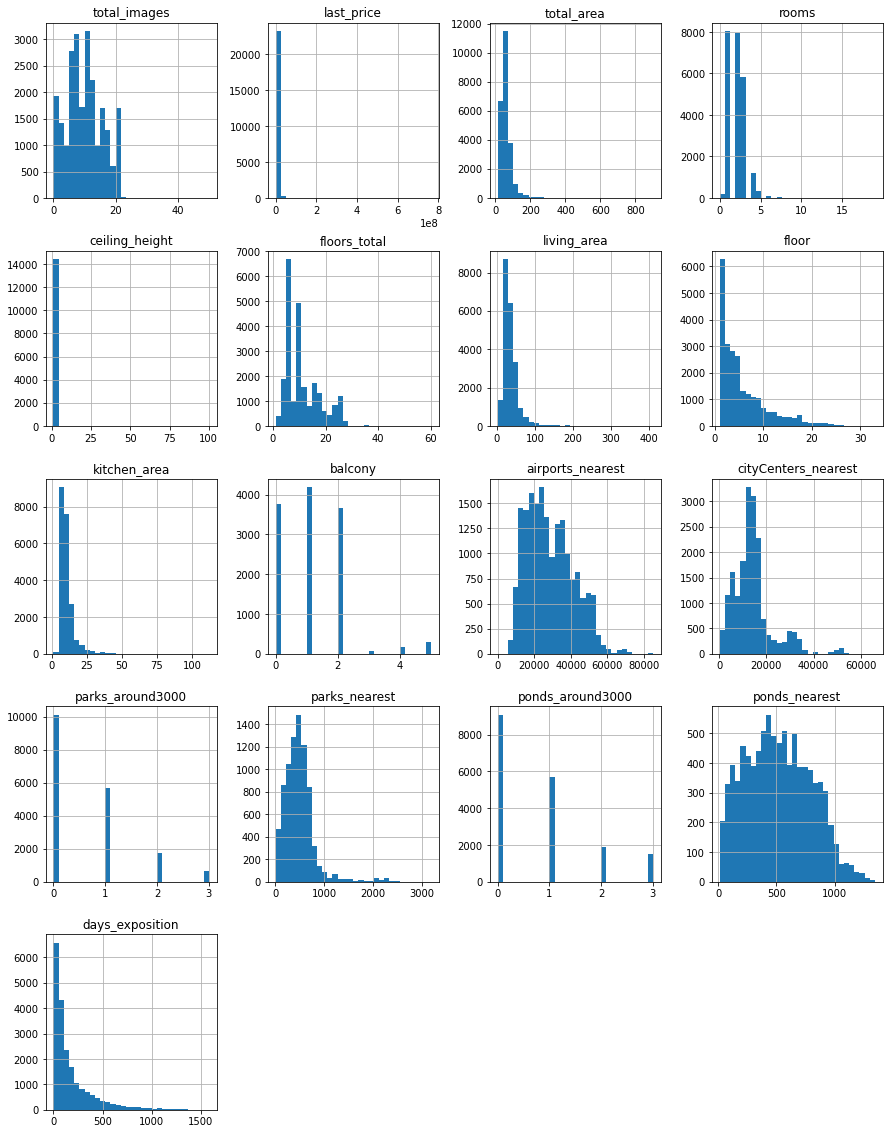

In [5]:
data.hist(figsize=(15, 20), bins=30);

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b>
<br>Если ты работаешь локально, то следует указывать два пути к файлу через конструкцию try...except...
<br>Поправь, пожалуйста, чтобы я смог проверить твой проект. На всякий случай приложу путь к файлу на платформе
    
    /datasets/real_estate_data.csv'
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>исправил. сделал отдельно
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Разбивай, пожалуйста, код на несколько ячеек, чтобы у тебя после стены кода не шла стена выводов. Так будет более наглядно и проще комментировать твой код
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Да действительно, так гораздо лучше и аккуратнее
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Да это хорошее предложение, так гораздо удобнее
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для вывода таблиц лучше использовать функцию display
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Оу да. спасибо, не знал такой способ
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

В некоторых данных определенно есть проблемы. Видно, что в некоторых столбцах есть выбросы например в цене, площади, высота потолков. Некоторые данные можно отнести к разряду категориальных(количество комнат, балконов)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

In [6]:
#посмотрим где пропуски
for col in data.columns:
    print(col, len(data[data[col].isna()])) 

total_images 0
last_price 0
total_area 0
first_day_exposition 0
rooms 0
ceiling_height 9195
floors_total 86
living_area 1903
floor 0
is_apartment 20924
studio 0
open_plan 0
kitchen_area 2278
balcony 11519
locality_name 49
airports_nearest 5542
cityCenters_nearest 5519
parks_around3000 5518
parks_nearest 15620
ponds_around3000 5518
ponds_nearest 14589
days_exposition 3181


In [7]:
#с начала обработаем неверные значения высоты потолка. если высота больше 100 видмо она указана в сантиметрах, 
#если больше 10 то видимо в дециметрах. переведем все в метры

for i in range(len(data['ceiling_height'])):
    if data.loc[i,'ceiling_height'] >= 100:
        data.loc[i,'ceiling_height'] = data.loc[i,'ceiling_height'] / 100
    elif data.loc[i,'ceiling_height'] >= 10:
        data.loc[i,'ceiling_height'] = data.loc[i,'ceiling_height'] / 10
#заменять в ceiling_height пропущенные значения средними думаю не стоит, так как это может затем повлиять на расчет. лучше посчитаем зависимость на существующих данных
#floors_total тоже не понятно как заменять пропущенные значения, видимо лучше оставить существующие

#is_apartment по видимомому все пропуски обозначают что это не аппартаменты, заменим пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False)

#balcony по всей видимости если не отмечено то количество балконов равно 0
data['balcony'] = data['balcony'].fillna(0)


Заполним значения показателей, которые представляются наиболее очевидными. Высота потолков, которые явно завышены. видимо были указаны в сантиметрах, а какие-то в дециметрах. и даже после преобразования высота в 8 метров смущает. но сильно влиять на данные не будет. заполнили пустые апартаменты на False и рустные балконы на 0

In [8]:
#locality_name высчитаем по удаленности от центра. данный способ допускает некоторое количество ошибок, но в целом должен дать хороший результат
#создадим таблицу которая посчитает среднее растояние от населенных пунктов до центра и аэропорта
#location_near = data.pivot_table(index='locality_name', values=('cityCenters_nearest', 'airports_nearest'), aggfunc='mean')
#print(data['locality_name'].unique())
#отсортируем для удобства
#location_near = location_near.sort_values('cityCenters_nearest')
#обнулим индексы для удобства перебора
#location_near['city'] = location_near.index
#location_near = location_near.reset_index(drop=True)
#построим коридоры растояний беря среднее между двумя крайними позициями
#location_near.loc[0,'up_bound'] = 0
#location_near.loc[len(location_near)-1,'down_bound'] = 70000
#for i in range(1,len(location_near)): 
#    location_near.loc[i,'up_bound'] = (location_near.loc[i,'cityCenters_nearest'] + location_near.loc[i-1,'cityCenters_nearest']) / 2
#    location_near.loc[i-1,'down_bound'] = (location_near.loc[i-1,'cityCenters_nearest'] + location_near.loc[i,'cityCenters_nearest']) / 2
#посмотрим где у нас пропуски, сдеелано для удобства чтобы не писать в циклах ошромные условия
#propusk = data['locality_name'].isna()

#наверное стоит с наало посмотреть а есть ли у них вообще растояния а то всех запишет в питер
#for i in range(len(propusk)):
#    if propusk[i] == True: 
#        print(data.loc[i,'cityCenters_nearest'], data.loc[i,'airports_nearest'])
# посмотрели растояния были не у всех. у кого этих значений нет мы не будем заменять
#обновим переменную пропуск для таких случаев, таких случаев оказалось 8
#for i in range(len(propusk)):
#    if propusk[i] == True and np.isnan(data.loc[i,'cityCenters_nearest']):
#        propusk[i] = False
        

#заполним пропуски городами в соответствии с коридорами. 
#еще бы лучше смотреть растояние от аэропорта и центра для больше точности, но не предумал как это сделать быстро

#for i in range(len(propusk)):
#    if propusk[i] == True: 
#        fam = data.loc[i,'cityCenters_nearest']
#        gorod = 'unknown'
#        for j in range(len(location_near)):
#            if fam > location_near.loc[j,'up_bound'] and fam <= location_near.loc[j,'down_bound']:
#                gorod = location_near.loc[j,'city']
#            
#        data.loc[i,'locality_name'] = gorod
        
        
#не уверен что это нужно, но заполним пропуски растояний от аэропорта и центра по среднем значения для городов и поселков
#m = 0
#for i in tqdm(range(len(propusk))):
#    if np.isnan(data.loc[i,'cityCenters_nearest']) == True:
#        for j in range(len(location_near['city'])):
#            if data.loc[i,'locality_name'] == location_near.loc[j,'city']:
#                data.loc[i,'cityCenters_nearest'] = location_near.loc[j,'cityCenters_nearest']
#                m +=1
#победа оказалась скромнее чем я думал. всего 125 пропусков заменили из 5000. посмотреть заранее что не у всех деревень есть растояния что-то я не подумал
#ну ладно оставлю жалко стирать
#повторим этот почти бесполезный шаг, когда-то я научусь с начала смотреть, а потом делать
#for i in tqdm(range(len(propusk))):
#    if np.isnan(data.loc[i,'airports_nearest']) == True:
#        for j in range(len(location_near['city'])):
#            if data.loc[i,'locality_name'] == location_near.loc[j,'city']:
#                data.loc[i,'airports_nearest'] = location_near.loc[j,'airports_nearest']
                

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать, так как мы не можем восстановить их с достаточной точностью. Лучше оставить их как есть.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Да, зря делал замены, тем более их всего 125 штук. На самом деле просто жалко было стирать
</div>

Попробовал вставить пропуски названия городов по удаленности от центра. Было бы конечно идеально по растоянию одновременно от центра и аэропорта. Но отсановился на данно версии. возможны некоторые ошибки, но их будет не много, так как 90% из замененных это Санкт-Петербург. 

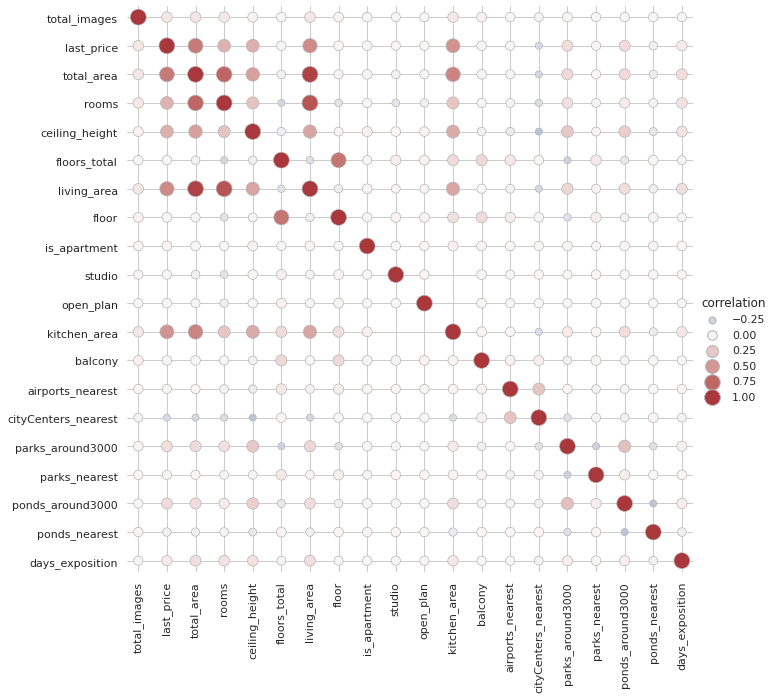

In [9]:
#попробуем вычислить высоту потолков, жилую площадь 
#построим матрицу корреляций и посмотрим с какими показателями есть взаимосвязь
sns.set_theme(style="whitegrid")


corr_mat = data.corr().stack().reset_index(name="correlation")

g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

Недостающие значения можно попробовать вычислить из других. которые имеют сильную ассоциацию с известными. Видно, что жилая площадь имеет хорошую корреляцию с общей площадью и количеством комнат, что в принципе логично. Площадь кухни имеет небольшие корреляции с ценой и общей площадью, можно попробовать. У высоты потолков есть небольшие корреляции, но результат сомнителен

In [10]:
#living_area попробуем заменить так.
#по матрице корреляций видно, что наблюдаеися хорошая корреляция жилой площади и количесвом комнат
#посроим линейную регрессию и попробуем найти зависичоть

data_copy2 = data.loc[:,'total_area':'rooms']
data_copy2['living_area'] = data['living_area']
data_copy2= data_copy2.dropna()

y = data_copy2['living_area']
x = data_copy2[['rooms', 'total_area']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            living_area   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.223e+05
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:19:43   Log-Likelihood:                -71049.
No. Observations:               21796   AIC:                         1.421e+05
Df Residuals:                   21793   BIC:                         1.421e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1710      0.094    -55.110      0.0

Получилась неплохая модель. R- квадрат равен 91,8%. можно использовать данное уравнения для вычисления жилой площади.

In [11]:
#вышло вполне неплохо Р квадрат равен 91,8%, что очень неплохо. вычислим жилую площадь
for i in range(len(data['living_area'])):
    if np.isnan(data.loc[i,'living_area']) == True:
        data.loc[i,'living_area'] = -5.171 + data.loc[i,'rooms']*6.0565 + data.loc[i,'total_area']*0.4507

Подставили значения

In [12]:
#kitchen_area поступим как с жилой площадью, выбрав с кем более менее есть корреляция
data_copy3 = data.loc[:,'last_price':'total_area']
data_copy3['kitchen_area'] = data['kitchen_area']
data_copy3 = data_copy3.dropna()

y = data_copy3['kitchen_area']

x = data_copy3[['last_price', 'total_area']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           kitchen_area   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     6807.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:19:45   Log-Likelihood:                -63166.
No. Observations:               21421   AIC:                         1.263e+05
Df Residuals:                   21418   BIC:                         1.264e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9184      0.067     72.936      0.0

In [13]:
#Довольно плохая линейная регрессия, но за неименеем лучшего заполним соглачно ней
for i in range(len(data['kitchen_area'])):
    if np.isnan(data.loc[i,'kitchen_area']) == True:
        data.loc[i,'kitchen_area'] = 4.9184 + data.loc[i,'last_price']*1.124e-07 + data.loc[i,'total_area']*0.0809

Получилась не очень удачная модель, но в целом придется пользоваться ей. Так как нет возможности предложить более точный вариант

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Интересный способ для замены) 
<br>Тут можно поступить проще и найти соотношение средней жилой / кухонной площади к средней общей площади и использовать полученное значение для замены пропусков
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>С начала так сделал по коэффициенту. Но пото захотелось попробовать через регрессию
</div>

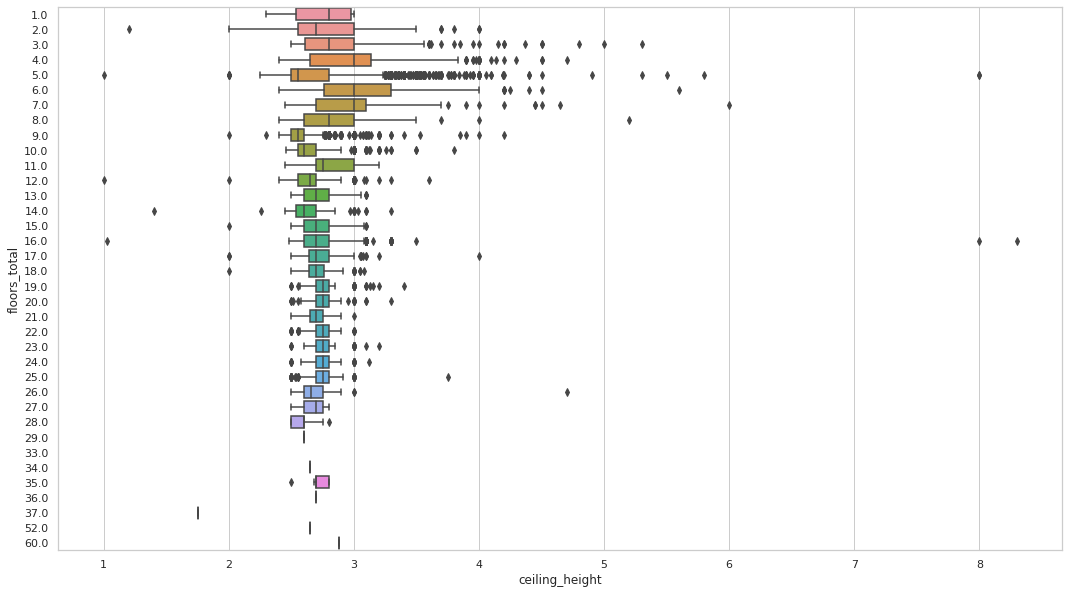

In [14]:
#линейная регрессия получилась совсем грустная. попробуем посмотреть есть ли зависимость медианы от этажности дома
fig, ax1 = plt.subplots(figsize=(18, 10))
sns.boxplot(y=data['floors_total'], x=data['ceiling_height'], data=data, orient="h", ax=ax1);

In [15]:
#статистически значимых различий мы тут кнечно не увидим, в идеале наверное иметь бы информацию о годе постройки
#но видно, что 4,6 и 7 этжные постройки имеют более высокие комнаты. заполним пропущщеные значение по медиане для каждого этажа
ceiling_height_median = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc='median')
ceiling_height_median.index


for i in tqdm(range(len(data['ceiling_height']))):
    if np.isnan(data.loc[i,'ceiling_height']) == True:
        for j in ceiling_height_median.index:
            if data.loc[i,'floors_total'] == j:
                data.loc[i,'ceiling_height'] = ceiling_height_median.loc[j,'ceiling_height']
                

100%|██████████| 23699/23699 [00:06<00:00, 3871.44it/s]


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер!
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Спасибо )
</div>

Высоту потолков с помощью линейной регрессии мне кажется заполнять не правомерно. Как удовлетворительный вариант рассмотрим заполнение пропущенных значений медианами, в зависимости от этажа. Данный способ мне тоже не нравится. Я бы наверное оставил как есть, но раз надо, то сделаем

In [16]:
#посмотрев на данные 
data['locality_name'] = data['locality_name'].str.replace(r'поселок городского типа ','поселок ')
data['locality_name'] = data['locality_name'].str.replace(r'посёлок ','поселок ')
data['locality_name'] = data['locality_name'].str.replace(r'городской ','поселок ')
data['locality_name'] = data['locality_name'].str.replace(r'городского типа ','поселок ')
data['locality_name'] = data['locality_name'].str.replace(r'село ','поселок ') 
data['locality_name'] = data['locality_name'].str.replace(r'коттеджный ','поселок ') 
data['locality_name'] = data['locality_name'].str.replace(r'при железнодорожной ','поселок ') 
data['locality_name'] = data['locality_name'].str.replace(r'поселокпоселок ','поселок ') 
data['locality_name'] = data['locality_name'].str.replace(r'поселок поселок ','поселок ') 
data['locality_name'] = data['locality_name'].str.replace(r'садоводческое некоммерческое товарищество ','сады ') 
data['locality_name'] = data['locality_name'].str.replace(r'садовое товарищество ','сады ')

In [17]:
data.sort_values('locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здесь всё верно, но достаточно было бы заменить е на ё, чтобы не искажать типы населённых пунктов
</div>

Заменили разночтения в названиях, посмотрели, вроде все проблемы решены

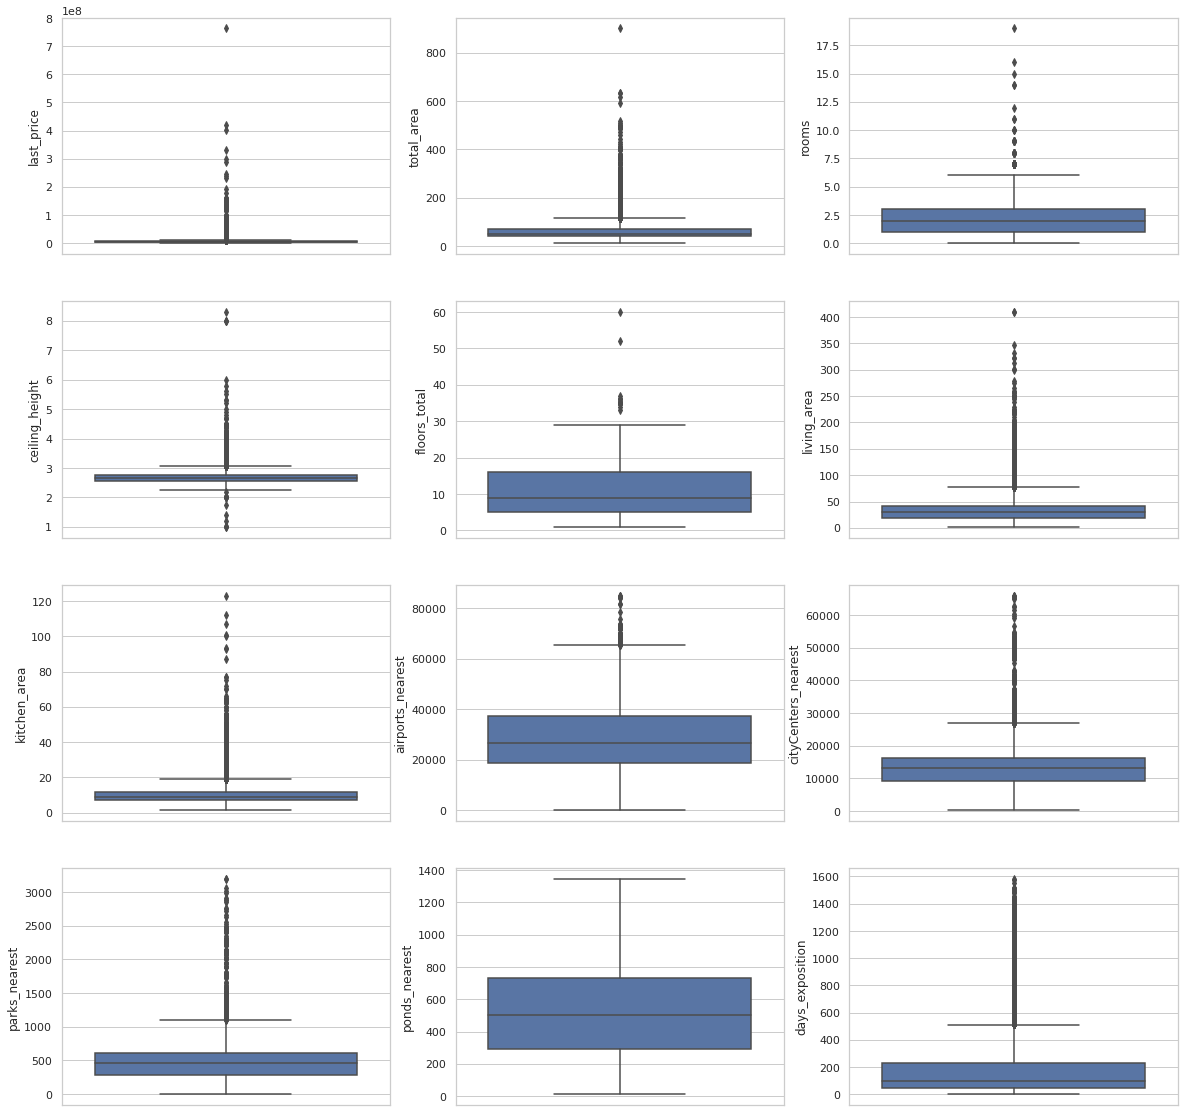

In [18]:
g = f, ((ax1,ax2,ax3), (ax4,ax5, ax6),(ax7,ax8,ax9), (ax10,ax11,ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

sns.boxplot(data=data, y="last_price",ax=ax1)
sns.boxplot(data=data, y="total_area",ax=ax2)
sns.boxplot(data=data, y="rooms",ax=ax3)
sns.boxplot(data=data, y="ceiling_height",ax=ax4)
sns.boxplot(data=data, y="floors_total",ax=ax5)
sns.boxplot(data=data, y="living_area",ax=ax6)
sns.boxplot(data=data, y="kitchen_area",ax=ax7)
sns.boxplot(data=data, y="airports_nearest",ax=ax8)
sns.boxplot(data=data, y="cityCenters_nearest",ax=ax9)
sns.boxplot(data=data, y="parks_nearest",ax=ax10)
sns.boxplot(data=data, y="ponds_nearest",ax=ax11)
sns.boxplot(data=data, y="days_exposition",ax=ax12);


Построили графики box-plot, чтобы примерно оценить данные и посмотреть где необходимо убрать выбросы

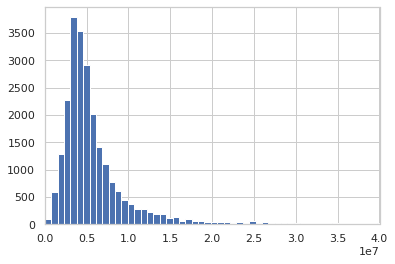

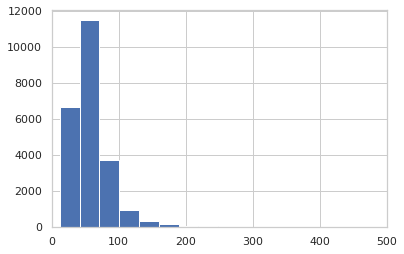

[(0.0, 100.0)]

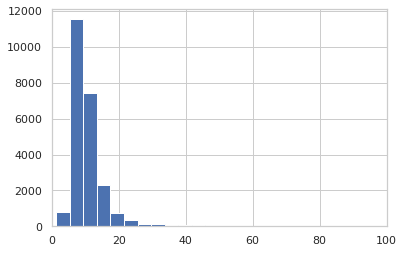

In [19]:
g=data['last_price'].hist(bins=1000)
g.set(xlim=(0, 40000000))
plt.show()
g2=data['total_area'].hist(bins=30)
g2.set(xlim=(0, 500))
plt.show()
g3=data['kitchen_area'].hist(bins=30)
g3.set(xlim=(0, 100))

На гистограммах видно что значений цены больше 30 миллионов достаточно мало и стоит убрать данные значения. Аналогично поступим с общей площадью больше 200 метров и площадью кухни больше 40 метров

In [20]:
data = data.query('last_price < 30_000_000')
data = data.query('total_area < 200')
data = data.query('kitchen_area < 40')
data = data.reset_index(drop=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

In [21]:
#меняем типы данных, чтобы сэкономить память
data = data.astype({'total_images': np.int8,
                    'last_price': np.int32,
                    'rooms': np.int8,
                    'floors_total': np.int8,
                    'floor': np.int8,
                    'balcony': np.int8,
                   }, errors = 'ignore')

In [22]:
#приводим дату к удобному формату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Поменли типы данных и формат даты

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно.
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [23]:
#посчитано и добавлено в таблицу: цена одного квадратного метра
data['price_meter'] = data['last_price'] / data['total_area']
#посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['publication_day'] = data['first_day_exposition'].dt.weekday
#посчитано и добавлено в таблицу: месяц публикации объявления
data['publication_month'] = data['first_day_exposition'].dt.month
#посчитано и добавлено в таблицу: год публикации объявления
data['publication_year'] = data['first_day_exposition'].dt.year
#посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
for i in range(len(data['floor'])):
    if data.loc[i,'floor'] == 1:
        data.loc[i,'type_floor'] = 'первый'
    elif data.loc[i,'floor'] == data.loc[i,'floors_total']:
        data.loc[i,'type_floor'] = 'последний'
    else: data.loc[i,'type_floor'] = 'другой'
#посчитано и добавлено в таблицу: расстояние в км до центра города
data['cityCenters_nearest_km'] = round((data['cityCenters_nearest'] / 1000),0)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию необходимо округлить результат до целых значений в колонке с расстоянием до центра
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Поправил
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Добавили новые переменные для анализа данных

### Проведите исследовательский анализ данных

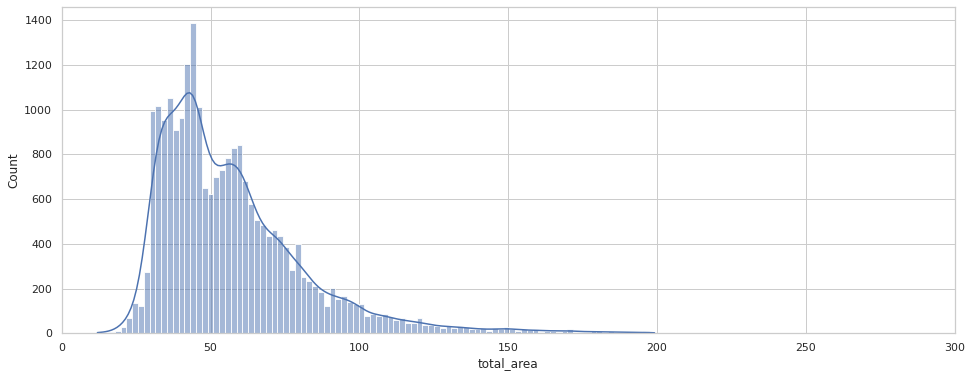

Описательная статистика.
Среднее: 57.21±0.16
Медиана: 51.1, межквартильный размах: 28.0
Минимальное значение: 12.0. Максимальное значение: 199.2.


In [24]:
#общая площадь
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="total_area", kde=True)
g.set(xlim=(0, 300))
plt.show()
stat = data['total_area'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

Распределение общей площади имеет несколько заметных пиков, что скорее всего связано с количеством комнат или типом застройки. Медиана и среднее значение не сильно разняться. Мы видим, что основная часть квартир находится в диапазоне от 25 до 80 квадратных метров.

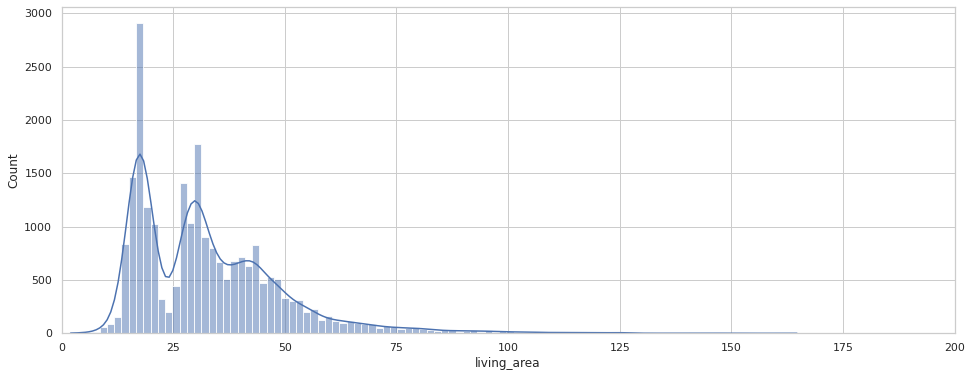

Описательная статистика.
Среднее: 32.85±0.11
Медиана: 30.0, межквартильный размах: 23.3
Минимальное значение: 2.0. Максимальное значение: 164.7.


In [25]:
#жилая площадь
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="living_area", kde=True)
g.set(xlim=(0, 200))
plt.show()
stat = data['living_area'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

Жилая площадь имеет более выраженные пики, которые скорее всего обусловлены количеством комнат. Как мы видим большинство значений находится в диапазоне от 12 до 60 квадратных метров

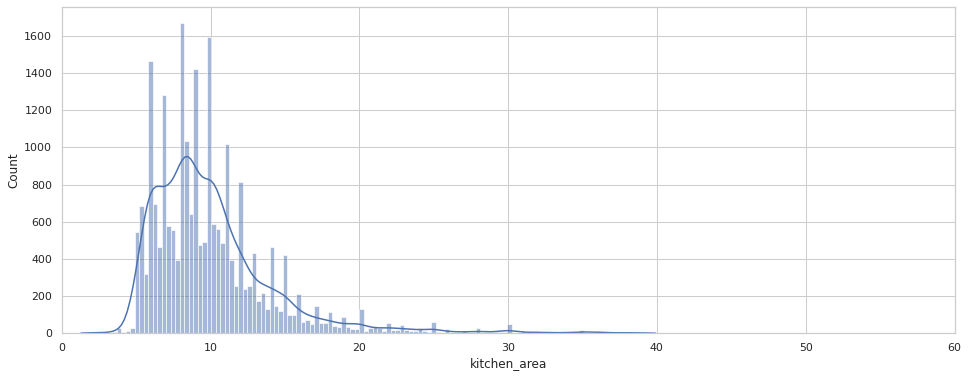

Описательная статистика.
Среднее: 10.09±0.03
Медиана: 9.0, межквартильный размах: 4.3
Минимальное значение: 1.3. Максимальное значение: 39.9.


In [26]:
#площадь кухни
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="kitchen_area", kde=True)
g.set(xlim=(0, 60))
plt.show()
stat = data['kitchen_area'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

Площадь кухни имеет интересное распределение, с ярко выраженными часто встречающимися значениями, что видимо связанно с типовой застройкой или определенными годами в застройке

In [27]:
#привели цену к миллионам
data['last_price'] = data['last_price'] / 1000000

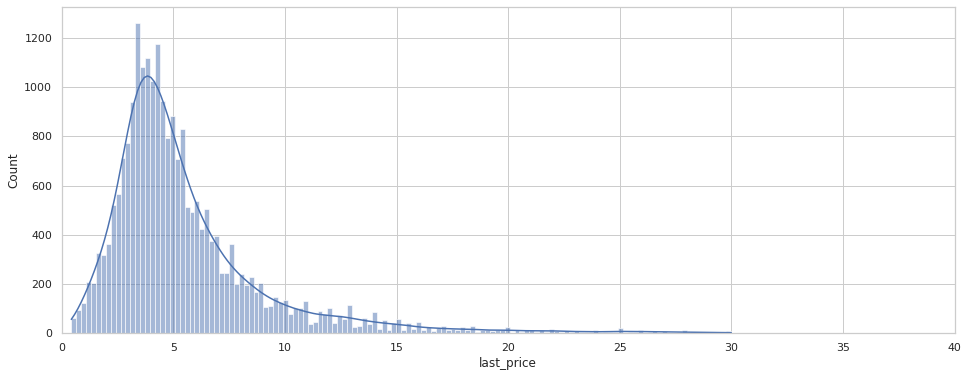

Описательная статистика.
Среднее: 5.63±0.02
Медиана: 4.6, межквартильный размах: 3.15
Минимальное значение: 0.43. Максимальное значение: 30.0.


In [28]:
#цена объекта
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="last_price", kde=True)
g.set(xlim=(0, 40))
plt.show()
stat = data['last_price'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Сделал
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>👍
</div>

Цена объекта имеет вид распределения Пуассона. Разброс у цены был самый большой среди всех изучаемых значений за счет как очень дорогих объектов, так и сильно недорогих

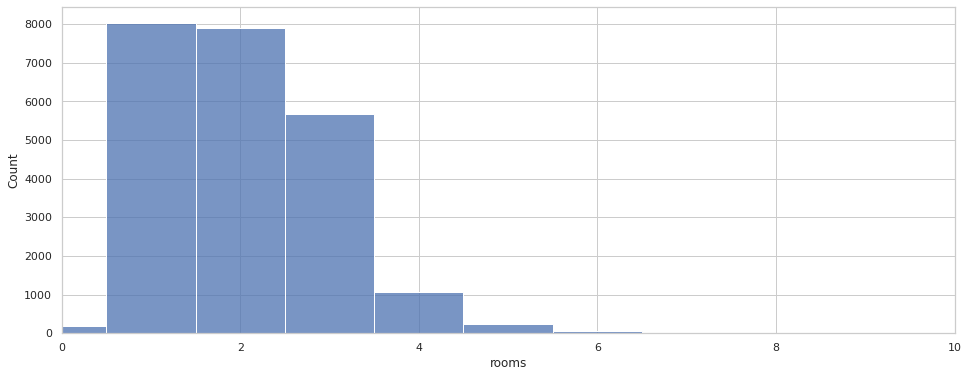

Описательная статистика.
Среднее: 2.02±0.01
Медиана: 2.0


In [29]:
#количество комнат
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="rooms", discrete=True)
g.set(xlim=(0, 10))
plt.show()
stat = data['rooms'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}' )

На графике видно, что самое популярное количество комнат 1. Практически столько же объявлений имеют 2 комнаты. 3 уже значительно меньше. 4 комнатные объекты и выше достаточно редки в представленной выборке

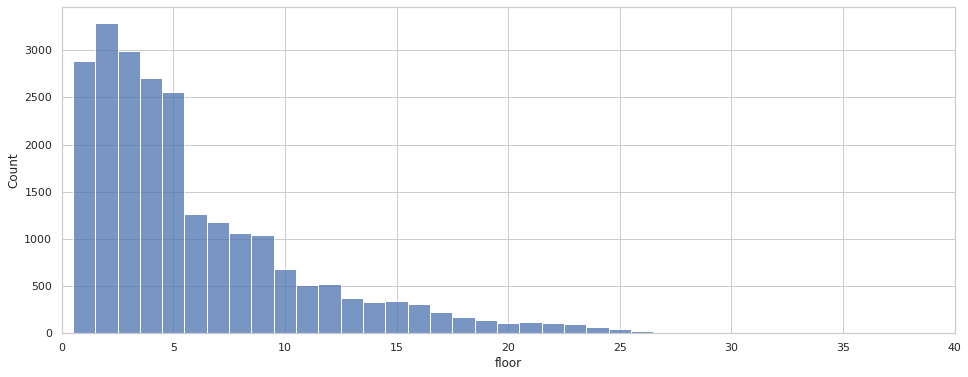

Описательная статистика.
Среднее: 5.91±0.03
Медиана: 4.0, межквартильный размах: 6.0
Минимальное значение: 1.0. Максимальное значение: 33.0.


In [30]:
#этаж квартиры;
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="floor", discrete=True)
g.set(xlim=(0, 40))
plt.show()
stat = data['floor'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

На графике представлено количество объявлений по этажам. Логично, было бы предположить, что наибольшее количество квартир должно быть на 1 этаже, но видимо на первом этаже часто находится коммерческая недвижимость, поэтому количество объявлений меньше чем на 2 этаже. количество этажей снижается постепенно до 5 этажа, после чего резко падает. Очевидно, что это связанно с большим количеством 5-этажных домов, советской застройки

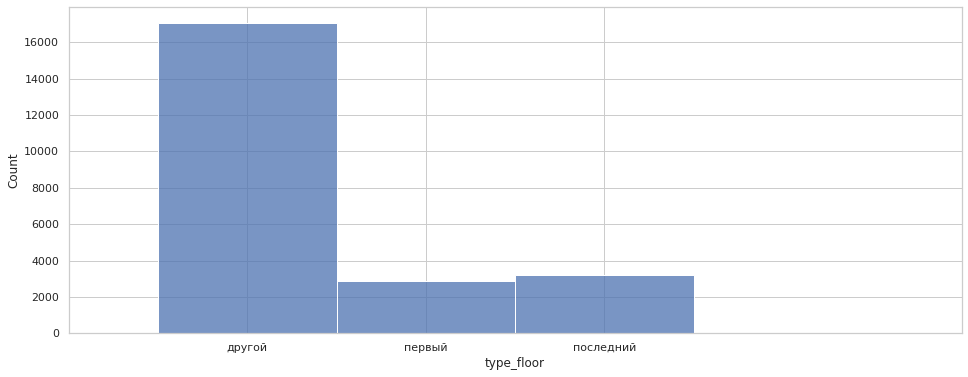

In [31]:
#тип этажа квартиры («первый», «последний», «другой»);
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="type_floor", discrete=True)
g.set(xlim=(-1, 4))
plt.show()


Видим соответствующее ожиданием распределение. Количество объявлений на первом этаже видимо так-же связанно с коммерческой недвижимостью

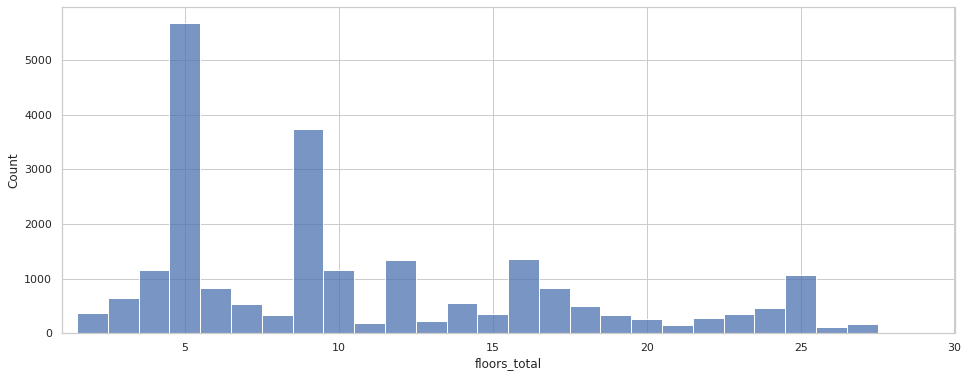

Описательная статистика.
Среднее: 10.74±0.04
Медиана: 9.0, межквартильный размах: 11.0
Минимальное значение: 1.0. Максимальное значение: 60.0.


In [32]:
#общее количество этажей в доме;
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="floors_total", discrete=True, bins=40)
g.set(xlim=(1, 30))
plt.show()
stat = data['floors_total'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

На данном графике хорошо проиллюстрирована типовая застройка. Большое количество 5-этажных домов. несколько отстает, но тоже много 9 этажные дома. Затем идут более современные 16 и 25 этажные дома

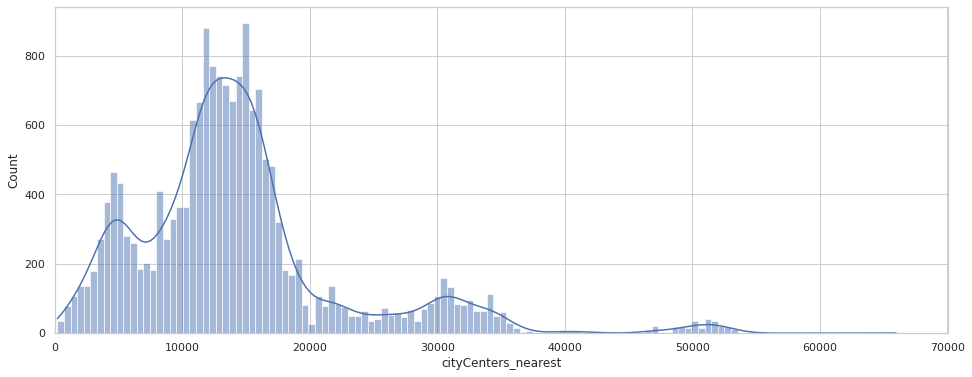

Описательная статистика.
Среднее: 14390.34±64.55
Медиана: 13222.0, межквартильный размах: 6784.0
Минимальное значение: 208.0. Максимальное значение: 65968.0.


In [33]:
#расстояние до центра города в метрах;
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="cityCenters_nearest", kde=True)
g.set(xlim=(0, 70000))
plt.show()
stat = data['cityCenters_nearest'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

На графике наблюдается несколько пиков. Очевидно, что первые 2 пика это районы Санкт-Петербурга. третий и четвертый пики по видимому крупные пригороды.

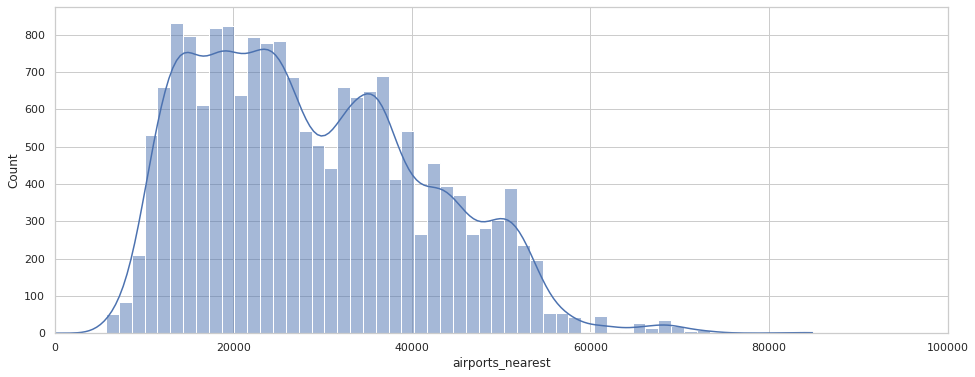

Описательная статистика.
Среднее: 28828.99±95.87
Медиана: 26786.0, межквартильный размах: 18962.0
Минимальное значение: 0.0. Максимальное значение: 84869.0.


In [34]:
#расстояние до ближайшего аэропорта;
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="airports_nearest", kde=True)
g.set(xlim=(0, 100000))
plt.show()
stat = data['airports_nearest'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

Расстояние до аэропорта имеет довольно однородное распределение, которое видимо обусловлено его расположением

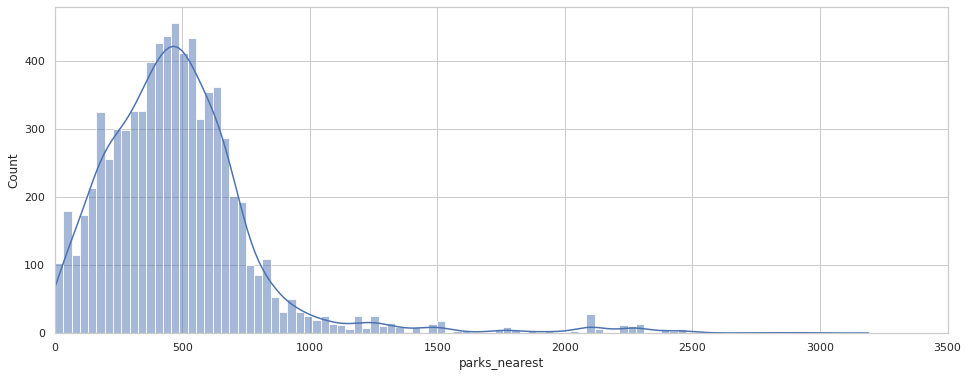

Описательная статистика.
Среднее: 494.09±3.89
Медиана: 456.0, межквартильный размах: 324.0
Минимальное значение: 1.0. Максимальное значение: 3190.0.


In [35]:
#расстояние до ближайшего парка;
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="parks_nearest", kde=True)
g.set(xlim=(0, 3500))
plt.show()
stat = data['parks_nearest'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )

По видимому в Петербурге много парков. и расстояние до них сравнительно небольшое. Медиана расстояния была 456 метров. Распределение стремится к нормальному

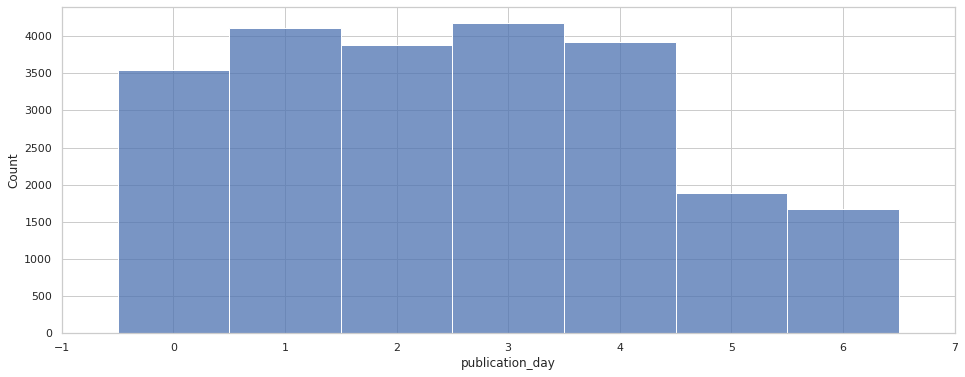

In [36]:
#день публикации объявления
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="publication_day", discrete=True, bins=40)
g.set(xlim=(-1, 7))
plt.show()


Можно отметить, что в будние дни публикуется гораздо больше объявлений. Чуть меньше в понедельник, по сравнению с остальными будними днями

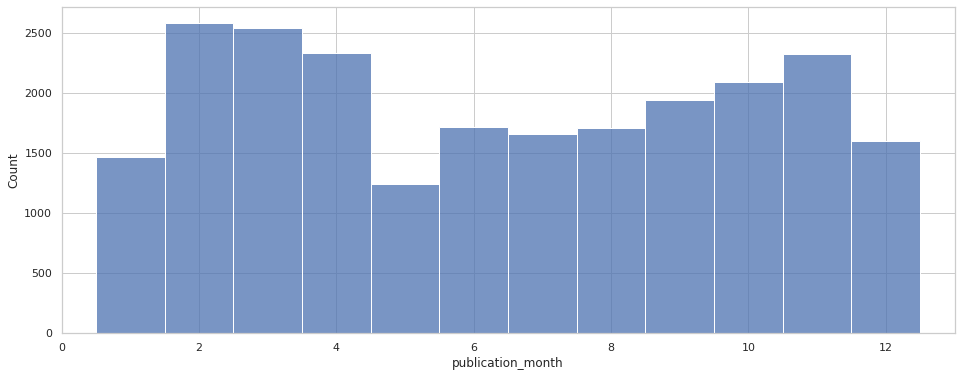

In [37]:
#месяц публикации объявления
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x=data["publication_month"], discrete=True, bins=40)
g.set(xlim=(0, 13))
plt.show()


На гистограмме построенной по месяцам мы видим, что самые популярный месяц для размещения объявлений о продаже недвижимости февраль. Затем до апреля количество объявлений немного снижается. падает до минимума в мае и затем с августа растет до ноября. В декабре и январе активность низкая

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа! 👏🏻👏🏻👏🏻 Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Отдельный плюс за то, что ты подписываешь оси у графиков
</div>

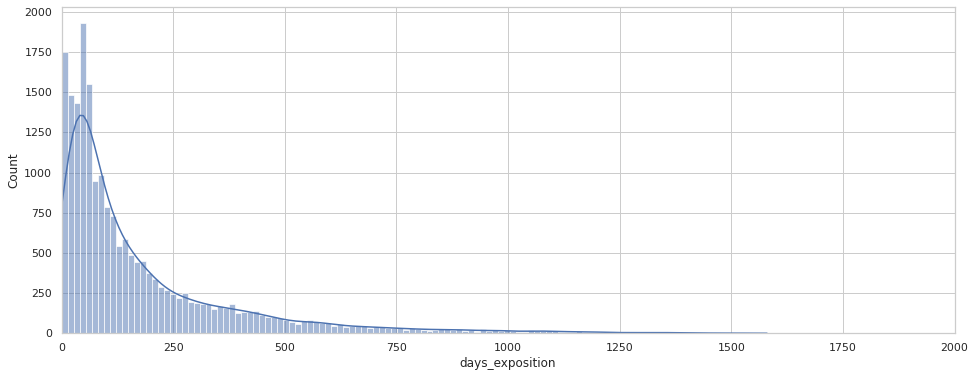

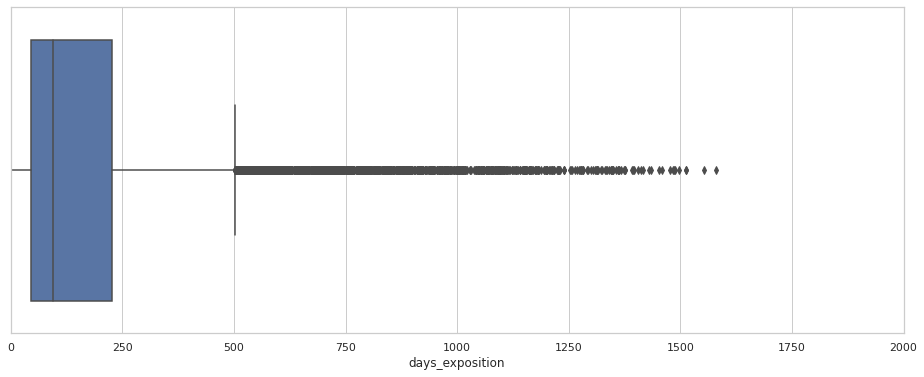

count    20142.000000
mean       178.659766
std        217.067994
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [38]:
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="days_exposition", kde=True)
g.set(xlim=(0, 2000))
plt.show()
plt.figure(figsize=(16, 6))
g2=sns.boxplot(x=data["days_exposition"])
g2.set(xlim=(0, 2000))
plt.show()

print(data['days_exposition'].describe()) 

In [39]:
stat = data['days_exposition'].describe()
print(f'Описательная статистика.\n'
      f'Среднее: {round(stat[1],2)}±{round(stat[2]/math.sqrt(stat[0]),2)}\n'
      f'Медиана: {round(stat[5],2)}, межквартильный размах: {round(stat[6]-stat[4],2)}\n'
      f'Минимальное значение: {round(stat[3],2)}. Максимальное значение: {round(stat[7],2)}.' )
print(f'25% квартиль: {round(stat[4],1)}\n'
      f'75% квартиль: {stat[6]}')

print(f'Нижняя граница выбросов: {stat[4] - (stat[6]-stat[4]) *1.5}\n'
      f'Верхняя граница выбросов: {stat[6] + (stat[6]-stat[4]) *1.5}'
     )


Описательная статистика.
Среднее: 178.66±1.53
Медиана: 94.0, межквартильный размах: 183.0
Минимальное значение: 1.0. Максимальное значение: 1580.0.
25% квартиль: 45.0
75% квартиль: 228.0
Нижняя граница выбросов: -229.5
Верхняя граница выбросов: 502.5


Распределение длительности экспозиции объявления имеет форму распределения Пуассона с Медианой в 94 дня. Среднее значение значительно больше и составляет 178 дней, что обусловлено присутствием в выборке очень долгих объявлений вплоть до 1580 дней. В целом можно оценить, что объявления которые были размещены менее 45 дней являлись быстрыми, в дольше 228 дней достаточно долгими. Крайне долгими можно считать объявления больше 502 дней, который выходили на 1,5 межквартильных размаха за 75% квартиль.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

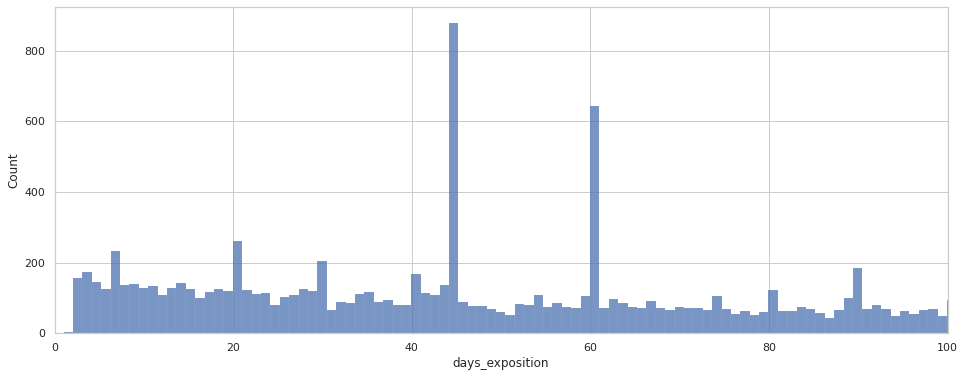

In [40]:
plt.figure(figsize=(16, 6))
g = sns.histplot(data=data, x="days_exposition", bins=1500)
g.set(xlim=(0, 100))
plt.show()

Обращают на себя внимания сроки 45 и 60 дней. Возможно они связаны со сроками размещегия объявлений на сайтах

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Сделал от 0 до 100 дней. Да интересная картина. Предположил объяснение этому, но не уверен
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Это действительно особенность функционирования системы размещения объявлений) Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

Коэффициент корреляции: 0.78, статистичекая значимость: 0.0


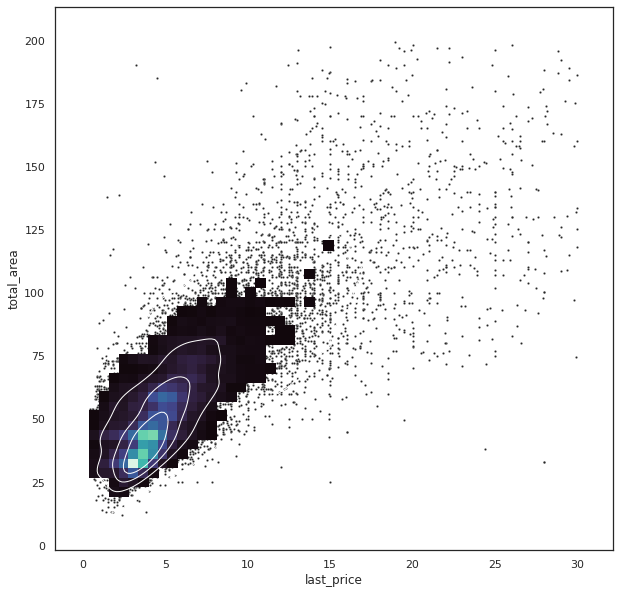

In [59]:
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=data['last_price'], y=data['total_area'], s=5, color=".15")
sns.histplot(x=data['last_price'], y=data['total_area'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=data['last_price'], y=data['total_area'], levels=5, color="w", linewidths=1);
corr, p = pearsonr(data['last_price'], data['total_area'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

Наблюдается сильная взаимосвязь стоимости недвижимости и ее площади. На графике видно, что увеличение площади, увеличивает стоимость недвижимости. Что подтверждается наличием корреляции, которая доходит до 0,78.  

Коэффициент корреляции: 0.68, статистичекая значимость: 0.0


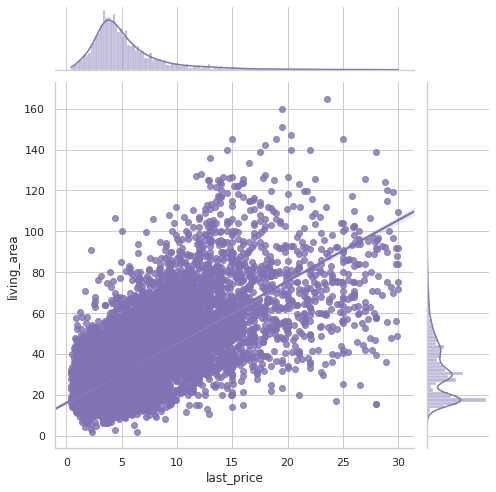

In [42]:
g = sns.jointplot(x="last_price", y="living_area", data=data,
                  kind="reg", truncate=False,
                  color="m", height=7)
corr, p = pearsonr(data['last_price'], data['living_area'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

Следуя из взаимосвязи общей площади и жилой площади, можно предположить , что и жилая площадь будет ассоциирована с ценой недвижимости. Что мы и наблюдаем на данном графике. Уровень корреляции данного параметра составил 0,68.

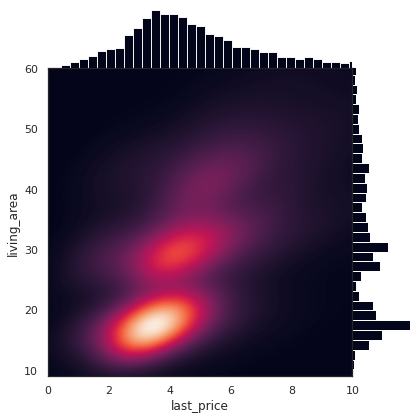

In [65]:
sns.set_theme(style="white")


g = sns.JointGrid(data=data, x="last_price", y="living_area", space=0, xlim=(0, 10), ylim=(9,60))
g.plot_joint(sns.kdeplot, 
             fill=True, clip=((0, 10), (9, 60)),
             thresh=0, levels=300, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=100);


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Космос 🚀🚀🚀
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Спасибо большое. Увидел этот график и все хотел куда-нибудь его применить. едиственное не понял как увеличить его размер. если подскажешь, буду очень благодарен.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Судя по документации размер настраивается через параметр height
    
    https://seaborn.pydata.org/generated/seaborn.JointGrid.html
</div>

Поскольку в распределении жилой площади есть пики был построен несколько модифицированный график. На котором явно видно градацию по площади по видимому 1-комнатных, 2-комнатных м 3-комнатных квартир. Стоимость на которые соответственно повышалась. 

Коэффициент корреляции: 0.59, статистичекая значимость: 0.0


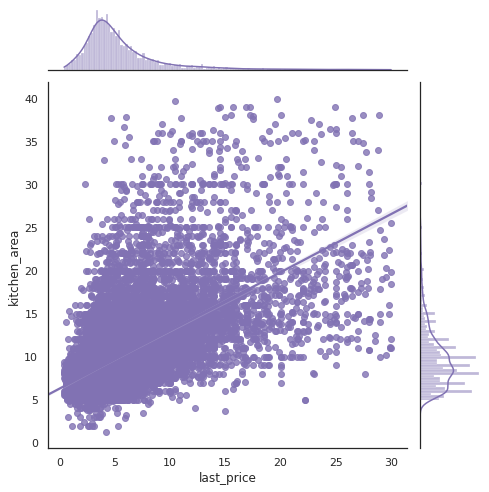

In [44]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="last_price", y="kitchen_area", data=data,
                  kind="reg", truncate=False,
                  color="m", height=7)
corr, p = pearsonr(data['last_price'], data['kitchen_area'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

Зависимость стоимости недвижимости от размера кухни так же наблюдалась. Хотя она не так сильно выражена, но все таки квартиры с большой кухней стояли как правило дороже, что по видимому обусловлено более дорогим классом жилья

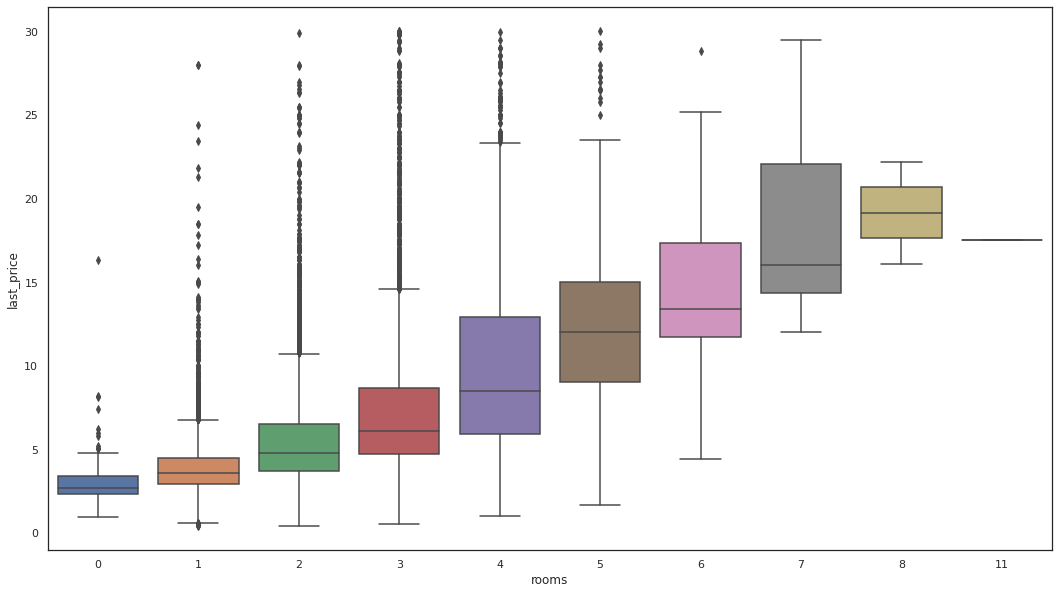

In [45]:
fig, ax1 = plt.subplots(figsize=(18, 10))
sns.boxplot(y=data['last_price'], x=data['rooms'], data=data, ax=ax1);

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная визуализация!
</div>

Анализ стоимости жилья в зависимости от количества комнат, показал ожидаемый результат. Чем больше комнат, тем дороже будет жилье. Что в общем вытекает из взаимосвязи количества комнат и общей площади.

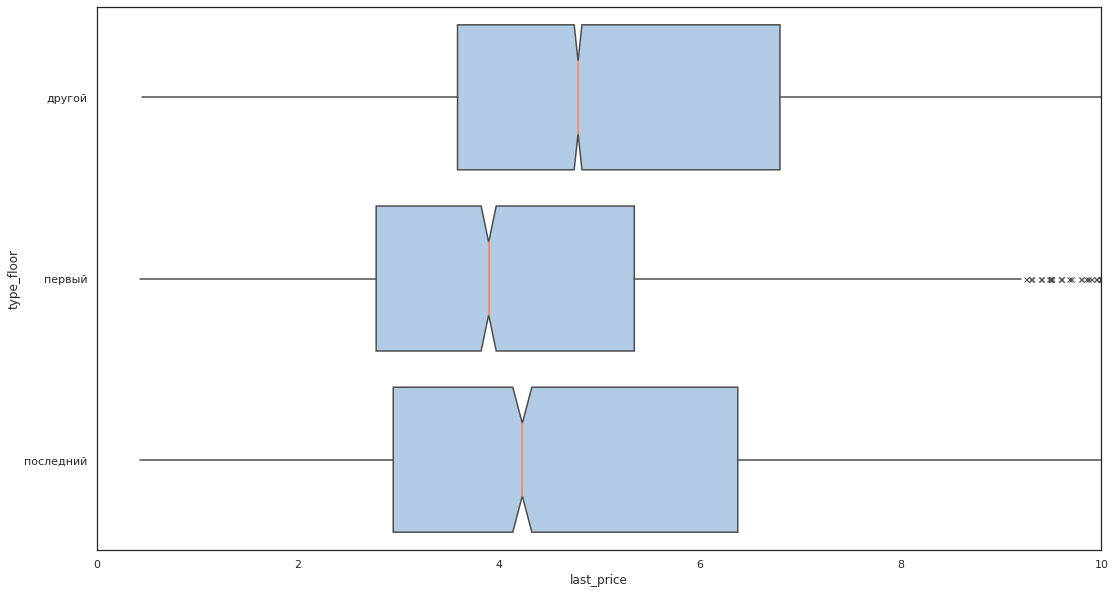

In [46]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g=sns.boxplot(
    data=data, x="last_price", y="type_floor",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
    
)
g.set(xlim=(0,10));

Как видно из приведенного графика на стоимость недвижимости значительно влияет и этаж объекта. Так самое недорогое жилье находится на 1 этаже, затем в градации цены находится последний этаж. И наиболее предпочтительным вариантом исходя из повышения стоимости является этаж отличный от первого и последнего. Масштаб оси Х увеличен для оценки статистической значимости различий медиан цены в каждой группе

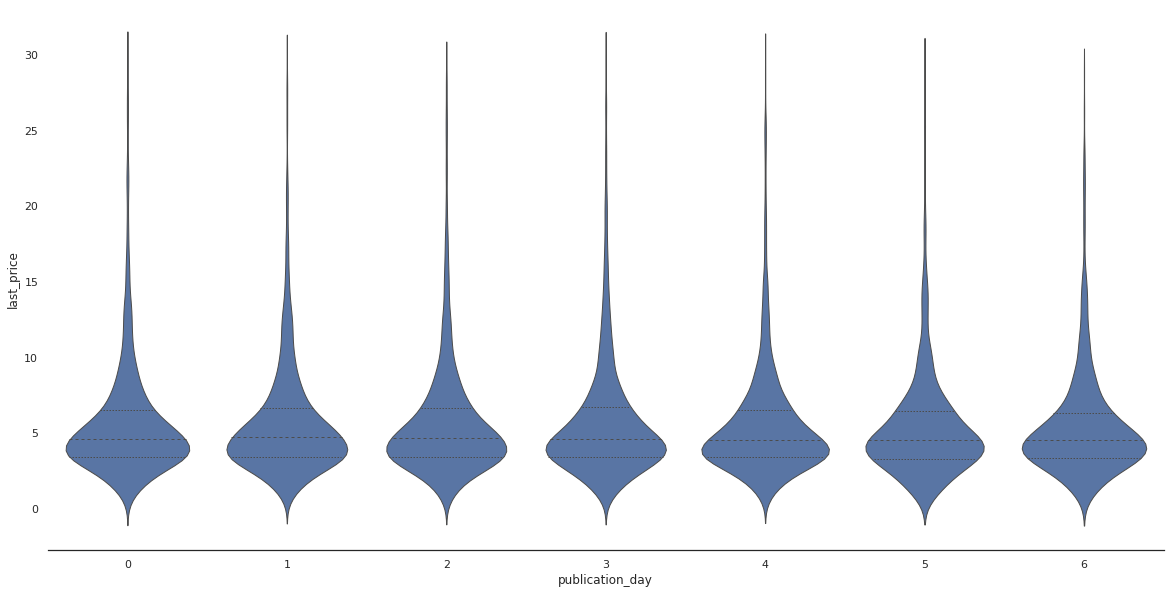

In [47]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=data, x="publication_day", y="last_price",
               split=True, inner="quart", linewidth=1,
               palette={'b'})
sns.despine(left=True)

Зависимости цены от дня публикации обнаружено не было. (разные графики везде немного сбивают и придают работе не гармоничный вид, но хотелось попробовать разные виды графиков, для эксперимента)

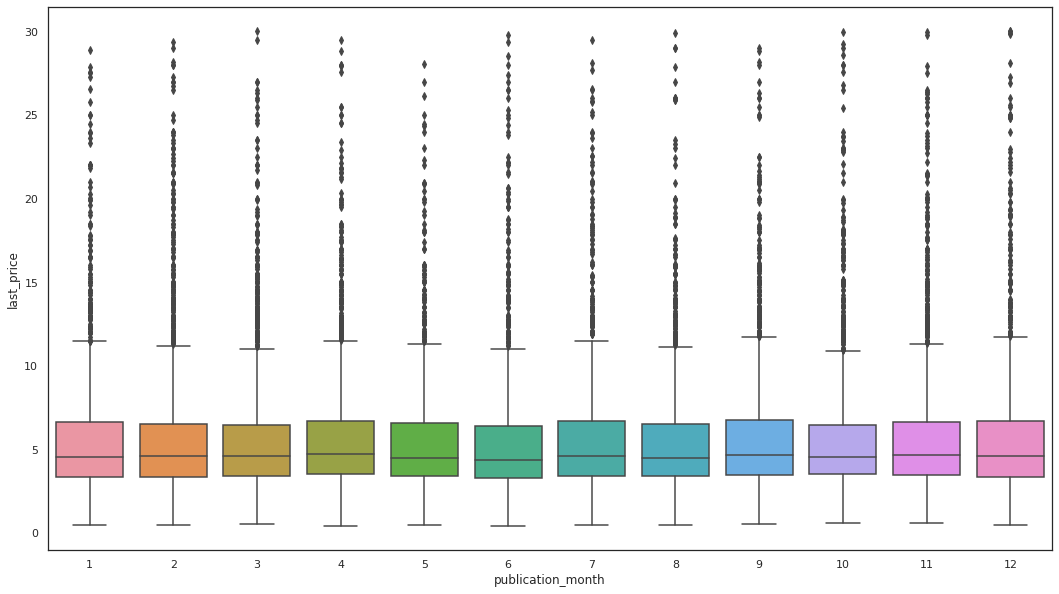

In [48]:
fig, ax1 = plt.subplots(figsize=(18, 10))
sns.boxplot(y=data['last_price'], x=data['publication_month'], data=data, ax=ax1);

Сильных колебаний в цене в зависимости от месяца не наблюдалось. Видны небольшие повышения цен в апреле или июле, но они незначительны

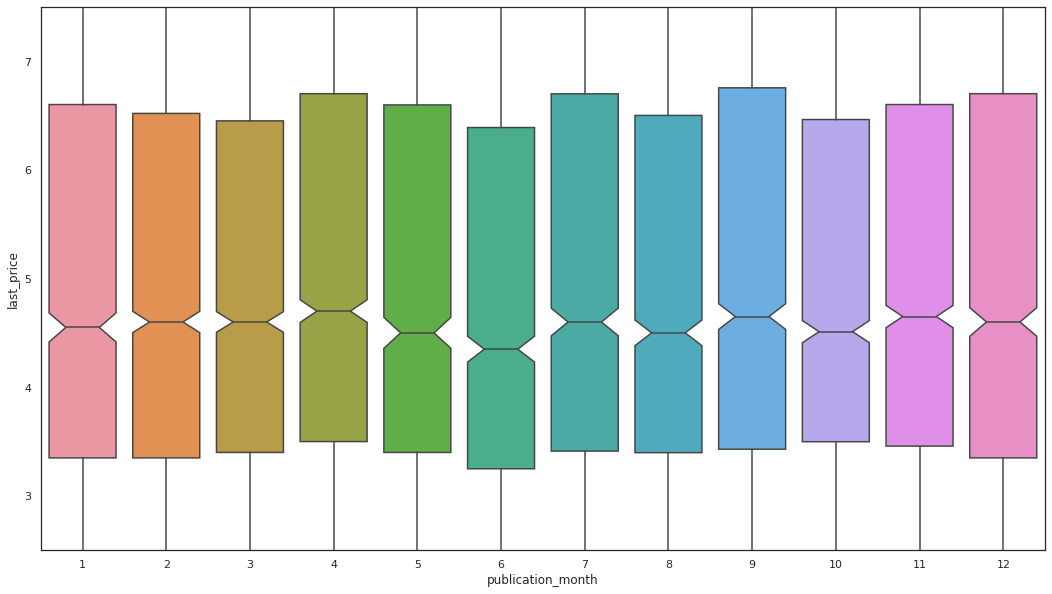

In [49]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=data['last_price'], x=data['publication_month'], data=data, ax=ax1, notch=True);
g.set(ylim=(2.5, 7.5));

Увеличив масштаб и добавив на график доверительные интервалы на график мы видим, что некоторые различия все же наблюдаются, например в июня были самые низкие цены. Как мы помним и количество объявлений в этот и предшествующий месяц было снижено. Но в целом оценка не меняется, месяц незначительно изменяет цену на недвижимость.

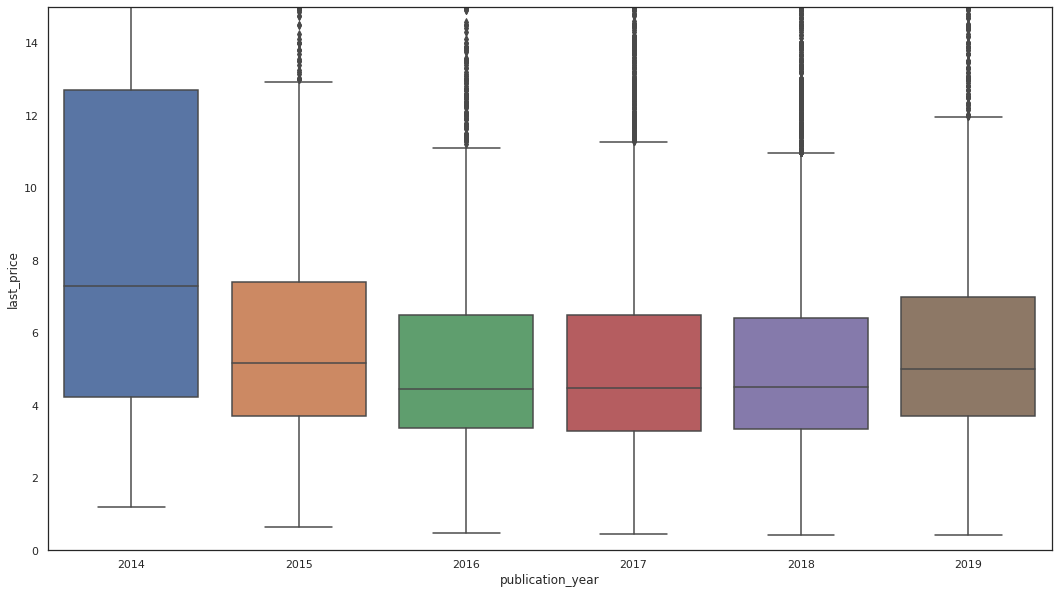

In [50]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=data['last_price'], x=data['publication_year'], data=data, ax=ax1);
g.set(ylim=(0,15));

Зависимость же цены от года наблюдалась значительная. так в 2014 году были самые высокие цены, которые резко снизились к 2016. Были низкие до 2018 и лишь в 2019 году начался небольшой рост цен

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

In [51]:
#Посчитайте среднюю цену одного квадратного метра в 10 населённых
#    пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра
data_price_meter = data.pivot_table(index='locality_name', values=('price_meter'), aggfunc=('count', 'mean'))
data_price_meter = data_price_meter.sort_values('count', ascending=False).head(10)
data_price_meter = data_price_meter.sort_values('mean', ascending=False)
display(data_price_meter)
data_price_meter['locality'] = data_price_meter.index




,count,mean
locality_name,,
Санкт-Петербург,15239,110434.566520
Пушкин,359,102826.254255
деревня Кудрово,299,92473.547576
поселок Парголово,326,90332.263023
поселок Мурино,555,85680.771391
поселок Шушары,439,78703.263242
Колпино,337,75333.295801
Гатчина,307,68746.146763
Всеволожск,398,68654.473986


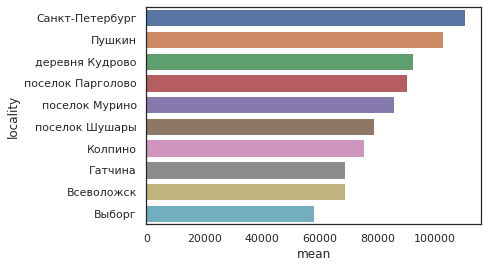

In [52]:
sns.barplot(
    data=data_price_meter, x="mean", y="locality"
);

Из представленной таблицы видно, что самая дорогая недвижимость находится в Санкт-Петербурге. Затем следует Пушкин и другие населенные пункты.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

Коэффициент корреляции: -0.34, статистичекая значимость: 0.0


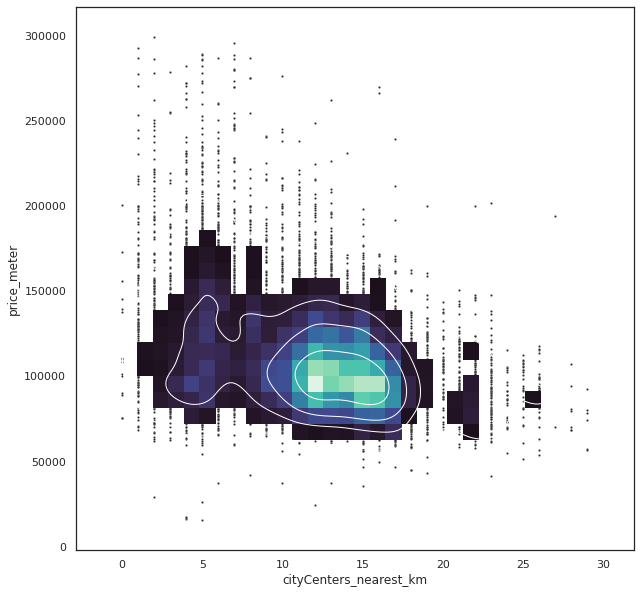

In [53]:
data['propusk'] = data['cityCenters_nearest'].isna()
for i in range(len(data['propusk'])):
    if data.loc[i,'locality_name'] != 'Санкт-Петербург':
        data.loc[i,'propusk'] = True        
good_data = data.query('propusk == False') # убрали квартиры без растояния, что не мешали расчетам
good_data = good_data.query('price_meter < 300_000') #немного подрезали цену,просто чтобы график не расползялся, там единичные значени остались

f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=good_data['cityCenters_nearest_km'], y=good_data['price_meter'], s=5, color=".15")
sns.histplot(x=good_data['cityCenters_nearest_km'], y=good_data['price_meter'], bins=30, pthresh=.1, cmap="mako")
sns.kdeplot(x=good_data['cityCenters_nearest_km'], y=good_data['price_meter'], levels=5, color="w", linewidths=1);
corr, p = pearsonr(good_data['cityCenters_nearest_km'], good_data['price_meter'])
print(f'Коэффициент корреляции: {round(corr, 2)}, статистичекая значимость: {round(p,3)}')

На графике видно что удаленность от центра приводит к снижению цены за квадратный метр. Коэффициент корреляции хоть и не велик, поскольку есть много факторов влияющих на стоимость квартиры. Но в целом данный фактор тоже действует.

                            OLS Regression Results                            
Dep. Variable:            price_meter   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1999.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:21:05   Log-Likelihood:            -1.7652e+05
No. Observations:               15164   AIC:                         3.530e+05
Df Residuals:                   15162   BIC:                         3.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.34

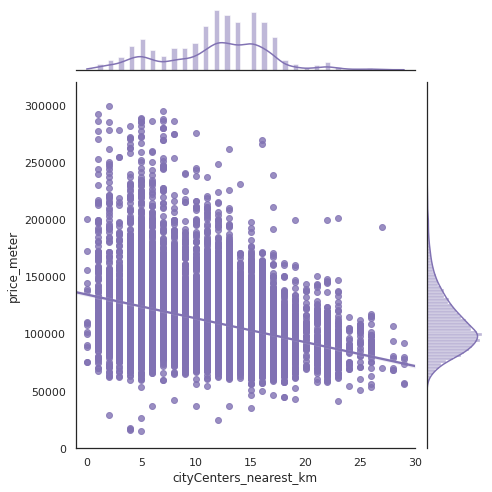

In [54]:

g = sns.jointplot(y="price_meter", x="cityCenters_nearest_km", data=good_data, xlim=(-1, 30), ylim=(0,320000),
                  kind="reg", truncate=False,
                  color="m", height=7)

x = good_data['cityCenters_nearest_km']

#define predictor variables
y = good_data['price_meter']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

Построив логистическую модель мы наблюдаем, что каждый километр удешевляет квартиру на 2085. Ну или если оценить напротив, перемещаясь к центру на 1 киллометр стоимости квартиры возрастает в среднем на 2085.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В данные попал не только Питер, так как график вышел за реальные пределы города
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Да пропустил, что в Питере.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

### Общий вывод

На стоимость квартиры влияет множество факторов. Для определения ведущих факторов влияющих на стоимость объектов недвижимости была проанализирована база данных объявлений. 
При предварительном анализе данных был выявлен ряд проблем. В частности, в ряде данных наблюдаются сильны выбросы, таких как цена, площадь, высота потолков.  Ряд данных имеет много пропусков. 

На первом этапе предобработки данных было выполнено:
-	Высота потолков приведена к единой размерности в метрах,
-	Заполнены данные для квартир, которые не являются апартаментами
-	Заполнены данные квартир в которых нет балконов
-	С помощью регрессионного анализа были определены уравнения зависимости жилой площади от общей площади и количества комнат. 

На основе полученного уравнения заполонены пропущенные значения.
-	Пропуски в площади кухни были заполнены так же с помощью уравнения логистической регрессии, в уравнение которой вошли общая площадь и цена. 
-	Пропуски в высоте потолков были заполнены медианными значениями в зависимости от этажности строения, так как есть определенные типовые проекты в зависимости от этажности здания. 
-	Привели название населенных пунктов к единому виду

На втором этапе работы из выборки были убраны аномальные значения и выбросы:
-	Были убраны объекты цена которых превышает 30 миллионов
-	Убраны из анализа объекты недвижимости площадью больше 200 квадратных метров
-	Убраны квартиры с площадью кухни больше 40 квадратных метров
-	Формат даты и времени приведен к DateTime

В данные были добавлены новые данные:
-	Цена квадратного метра 
-	День недели публикации объявления
-	Месяц публикации объявления
-	Год публикации объявления
-	Тип этажа квартиры (первый, последний, другой)
-	Расстояние от центра в километрах 

Проведен исследовательский анализ данных.

Было показано, что распределение общей площади имеет несколько заметных пиков, что скорее всего связано с количеством комнат или типом застройки. Медиана площади составляла 51,1 квадратный метр. Минимальное значение площади составило 12 квадратных метров.  Основная часть квартир находится в диапазоне от 25 до 80 квадратных метров.

Жилая площадь имеет более неравномерное распределение и пики обусловлены количеством комнат. Большинство значений находится в диапазоне от 12 до 60 квадратных метров.

Площадь кухни имеет несколько часто встречающихся значений, что, по-видимому, обусловлено массовой типовой застройкой.
Анализ цены показал, что медиана стоимости составляет 4,6 миллионов. Большинство цен было сосредоточено в диапазоне от 1,5 до 7,5 миллионов.

Большинство объявлений было на 1-комнатные квартиры, немного меньше было 2-комнатных.
Наиболее часто встречаются объявление о продаже квартир с 1 по 5 этаж, несколько реже с 6 по 9. Остальные этажи представлены значительно реже.

Большое количество 5-этажных домов. несколько отстает, но тоже много 9 этажных домов. Затем идут более современные 16 и 25 этажные дома.

Анализ удаленности от центра показал, что наблюдается большое количество объявлений в Санкт-Петербурге, что безусловно связанно с общим количеством недвижимости.
Парки в среднем были удалены на 494 метра.

В будние дни публикуется гораздо больше объявлений. Чуть меньше в понедельник, по сравнению с остальными будними днями.
При анализе по месяцам мы видим, что самые популярный месяц для размещения объявлений о продаже недвижимости февраль. Затем до апреля количество объявлений немного снижается. падает до минимума в мае и затем с августа растет до ноября. В декабре и январе активность низкая.

Распределение длительности экспозиции объявления имеет форму распределения Пуассона с Медианой в 94 дня. Среднее значение значительно больше и составляет 178 дней, что обусловлено присутствием в выборке очень долгих объявлений вплоть до 1580 дней. В целом можно оценить, что объявления, которые были размещены менее 45 дней являлись быстрыми, в дольше 228 дней достаточно долгими. Крайне долгими можно считать объявления больше 502 дней.

Наблюдается сильная взаимосвязь стоимости недвижимости и ее площади. На графике видно, что увеличение площади, увеличивает стоимость недвижимости. Что подтверждается наличием корреляции, которая доходит до 0,78.
Следуя из взаимосвязи общей площади и жилой площади, можно предположить, что и жилая площадь будет ассоциирована с ценой недвижимости. Что мы и наблюдаем, уровень корреляции данного параметра составил 0,68.

Зависимость стоимости недвижимости от размера кухни так же наблюдалась. Квартиры с большой кухней стояли как правило дороже, что, по-видимому, обусловлено более дорогим классом жилья.
Анализ стоимости жилья в зависимости от количества комнат показал, что, чем больше комнат, тем дороже будет жилье. Что в общем вытекает из взаимосвязи количества комнат и общей площади.

На стоимость недвижимости значительно влияет и этаж объекта. Так самое недорогое жилье находится на 1 этаже, затем в градации цены находится последний этаж. И наиболее предпочтительным вариантом исходя из повышения стоимости является этаж отличный от первого и последнего. Масштаб оси Х увеличен для оценки статистической значимости различий медиан цены в каждой группе.
Зависимости цены от дня публикации обнаружено не было.

Сильных колебаний в цене в зависимости от месяца не наблюдалось. Видны небольшие повышения цен в апреле или июле, но они незначительны.

Наблюдалась зависимость цены от года. Так в 2014 году были самые высокие цены, которые резко снизились к 2016. Были низкие до 2018 и лишь в 2019 году начался небольшой рост цен.

Из представленных данных видно, что самая дорогая недвижимость находится в Санкт-Петербурге. Затем следует Пушкин и другие населенные пункты.
Построив логистическую модель, было обнаружено, что, перемещаясь к центру на 1 километр стоимости квартиры возрастает в среднем на 2085. 

Наиболее значительным фактором является общая площадь недвижимости. Данный показатель показывает наибольшую корреляцию со стоимость. Вытекающий из общей площади параметр жилой площади и количество комнат, так же в значительной степени ассоциированы со стоимостью квартиры. Несколько независимый, но все же связанный параметр площади кухни также играет в сторону удорожания квартиры. 

Безусловно на стоимость влияет местонахождение объекта. Самые дорогие квартиры были в Санкт-Петербурге, Пушкине и поселках, находящихся около центра. Из чего следует, что и удаленность от центра влияет на стоимость, снижая ее.
Также факторами, снижающими стоимость квартиры являются первый этаж в большей степени и последний этаж.
Год объявления так же влиял на стоимость квартиры поскольку существует динамика стоимости недвижимости в зависимости от экономической ситуации. 
Такие параметры как день публикации и месяц не оказывали влияния на стоимость квартиры.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай увеличим объем вывода, чтобы он получится более подробным. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. Твой вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Супер! Так гораздо лучше)
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- округлить результат в столбце с расстоянием до центра в километрах
<br>- корректно рассчитать стоимость каждого километра в последнем шаге
<br>- дописать общий вывод
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Спасибо большое, за все замечания и предложения. Они были очень полезными.
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Спасибо тебе за отличный проект!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод